# Library and Global Variables

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import sys
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
sys.path.insert(0, '..') # to access the module one level up

In [3]:
from Transliterate.transliterate.utils.vowels import Vowels

In [4]:
VOWELS = Vowels().all_vowels

def isVowel(char: str) -> bool: 
    if char[-1] in ['2', '3', '4', '5']: # handle the tonations
        char = char[:-1]
    return char in VOWELS

# Preparing the Methods


In [5]:
def get_bi_phonemes(csv_path: str, show_results=False) -> defaultdict:

    df = pd.read_csv(csv_path)
    bi_phonemes = defaultdict(int)

    for index, row in tqdm(df.iterrows()):
        thai_phonemes = row['thai phoneme'].split(' ')
        thai_phonemes = [ph for ph in thai_phonemes if ph != '_']
        
        for i in range(len(thai_phonemes) - 1):
            current_phoneme = thai_phonemes[i]
            next_phoneme = thai_phonemes[i + 1]
            eos = True

            if i != len(thai_phonemes) - 2:
                eos = False
                next_next_phoneme = thai_phonemes[i + 2]

            if not isVowel(current_phoneme):
                if isVowel(next_phoneme):
                    bi_phonemes[(current_phoneme, next_phoneme)] += 1
            else:
                if not eos:
                    if not isVowel(next_phoneme) and not isVowel(next_next_phoneme):
                        bi_phonemes[(current_phoneme, next_phoneme)] += 1
                else:
                    if not isVowel(next_phoneme):
                        bi_phonemes[(current_phoneme, next_phoneme)] += 1

    if show_results:
        for bigram, count in bi_phonemes.items():
            print(f"{bigram}: {count}")

        print(f"Total bi-phonemes: {sum(bi_phonemes.values())}")

    return bi_phonemes

def unknown_bi_phonemes(bi_phonemes1: defaultdict, bi_phonemes2: defaultdict) -> list:
    unknown = []
    for phoneme in bi_phonemes1.keys():
        if phoneme not in bi_phonemes2.keys():
            unknown.append(phoneme)

    return unknown
    
def compare_bi_phonemes(bi_phonemes1: defaultdict, title_1: str , bi_phonemes2: defaultdict, title_2: str) -> None:
    bi_phonemes2 = {k: v for k, v in sorted(bi_phonemes2.items(), key=lambda item: item[1], reverse=True)}
    total_bi_phonemes = list(bi_phonemes2.keys()) + unknown_bi_phonemes(bi_phonemes1, bi_phonemes2)

    bi_phonemes_1_counts = [bi_phonemes1.get(ph, 0) for ph in total_bi_phonemes]
    bi_phonemes_2_counts = [bi_phonemes2.get(ph, 0) for ph in total_bi_phonemes]   

    np_bi_phonemes1_counts = np.array(bi_phonemes_1_counts) / sum(bi_phonemes_1_counts)
    np_bi_phonemes2_counts = np.array(bi_phonemes_2_counts) / sum(bi_phonemes_2_counts)

    index = np.arange(len(total_bi_phonemes))
    bar_height = 0.8
    fig_height = len(total_bi_phonemes) * bar_height * 0.2
    fig, ax = plt.subplots(figsize=(10, fig_height))

    bar1 = ax.barh(index, np_bi_phonemes1_counts, bar_height, color='blue', label=title_1)
    ax.plot(np_bi_phonemes2_counts, index, color='red', label=title_2)
    ax.set_title('Bi-Phoneme Distributions Comparison')
    ax.set_xlabel('Count')
    ax.set_ylabel('Bi-Phonemes')
    ax.set_yticks(index)
    ax.set_yticklabels(total_bi_phonemes, fontsize=10)
    ax.legend()

    plt.subplots_adjust(left=0.2, right=0.95, top=0.9, bottom=0.1)
    plt.tight_layout()
    plt.savefig('./ThaiBiPhonemesDistribution.png', bbox_inches='tight')
    plt.show()


In [6]:
generated_path = '../generated/processed/combined_sentences_with_phoneme.csv'
tsync2_path = '../tsync2/processed/combined_tsync2_thai_sentences_phoneme.csv'

generated_bi_phonemes = get_bi_phonemes(generated_path)
tsync2_bi_phonemes = get_bi_phonemes(tsync2_path)

2025it [00:00, 9060.42it/s]
2710it [00:00, 9466.65it/s]


In [7]:
print(f"Generated bi-phonemes: {len(generated_bi_phonemes)}")
print(f"Tsync2 bi-phonemes: {len(tsync2_bi_phonemes)}")

Generated bi-phonemes: 1047
Tsync2 bi-phonemes: 2448


# Plot the Distributions

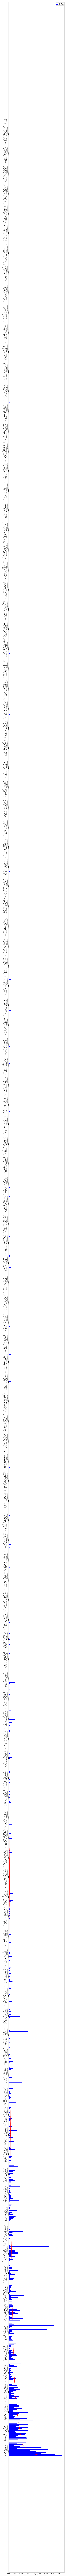

In [8]:
compare_bi_phonemes(generated_bi_phonemes, 'Generated', tsync2_bi_phonemes, 'Tsync2')

# Check the Non-existing Phonemes

In [9]:
print(f'In Generated but not in Tsync2: {unknown_bi_phonemes(generated_bi_phonemes, tsync2_bi_phonemes)}')
print(f'In Tsync2 but not in Generated: {unknown_bi_phonemes(tsync2_bi_phonemes, generated_bi_phonemes)}')

In Generated but not in Tsync2: [('d', 'a3'), ('tr', 'iː2'), ('j', 'a5'), ('cʰ', 'iːa3'), ('l', 'ɯːa'), ('j', 'ᴐː2'), ('bl', 'a2')]
In Tsync2 but not in Generated: [('kʰr', 'aː3'), ('kʰr', 'ɤ2'), ('s', 'eː'), ('bl', 'i2'), ('j', 'eː'), ('h', 'u3'), ('cʰ', 'uː2'), ('ʔ', 'u5'), ('b', 'iː2'), ('iː2', 'p'), ('pr', 'eː2'), ('pʰ', 'u4'), ('pʰ', 'a5'), ('ʔ', 'uːa'), ('d', 'u2'), ('d', 'i3'), ('cʰ', 'ᴐː'), ('kʰl', 'ᴐː'), ('kʰ', 'uː3'), ('pʰl', 'u5'), ('pʰl', 'a5'), ('l', 'ɛ2'), ('t', 'iː5'), ('kr', 'aː2'), ('kʰ', 'e5'), ('pʰr', 'i'), ('b', 'e'), ('m', 'ᴐː2'), ('h', 'i2'), ('ʔ', 'ɯ2'), ('tʰ', 'uːa4'), ('uːa4', 'ŋ'), ('pʰ', 'e4'), ('b', 'u2'), ('pʰl', 'ɛː'), ('kʰ', 'o2'), ('o2', 'm'), ('kʰ', 'uː2'), ('c', 'i5'), ('i5', 'w'), ('k', 'a3'), ('ʔ', 'iː3'), ('m', 'o'), ('kʰ', 'oː'), ('oː', 'n'), ('b', 'eː2'), ('s', 'iː2'), ('kr', 'eː2'), ('f', 'ɤː4'), ('kr', 'uː2'), ('kʰr', 'i2'), ('tʰ', 'u2'), ('b', 'ɤː2'), ('cʰ', 'ɯːa4'), ('k', 'aː4'), ('aː4', 't'), ('tʰr', 'oː3'), ('tʰ', 'ɯː5'), ('pʰ', 'u3'), ('s',